# Logistic Regression


In [1]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names = col_names, index_col = 'id')
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [6]:
len(glass)

214

In [7]:
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


Text(0, 0.5, 'household')

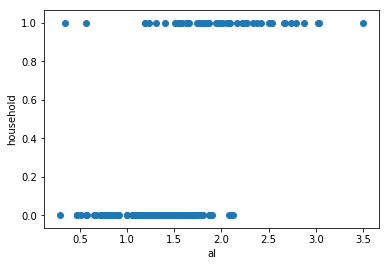

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [12]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X,y)
glass['household_pred'] = linreg.predict(X)

Text(0, 0.5, 'household')

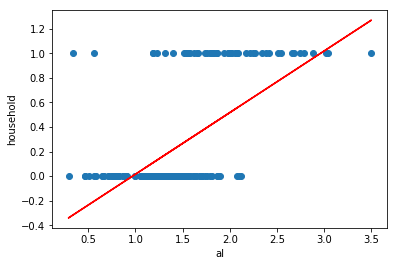

In [17]:
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred,color='red')
plt.xlabel('al')
plt.ylabel('household')

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
glass.head(5)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class
id,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0,0.065459,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0,0.195765,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0,0.285976,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0,0.160682,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0,0.135623,0


In [21]:
print(logreg.predict_proba(X))

[[9.57512963e-01 4.24870368e-02]
 [8.83729869e-01 1.16270131e-01]
 [7.81727605e-01 2.18272395e-01]
 [9.10590269e-01 8.94097310e-02]
 [9.26210406e-01 7.37895944e-02]
 [7.19368281e-01 2.80631719e-01]
 [9.50165283e-01 4.98347166e-02]
 [9.65248419e-01 3.47515807e-02]
 [8.79365064e-01 1.20634936e-01]
 [8.83729869e-01 1.16270131e-01]
 [7.67126168e-01 2.32873832e-01]
 [9.17167650e-01 8.28323504e-02]
 [8.65415687e-01 1.34584313e-01]
 [9.17167650e-01 8.28323504e-02]
 [9.03545531e-01 9.64544686e-02]
 [9.29017074e-01 7.09829263e-02]
 [9.46053995e-01 5.39460046e-02]
 [9.81890179e-01 1.81098214e-02]
 [9.41624370e-01 5.83756296e-02]
 [6.56717894e-01 3.43282106e-01]
 [8.15293899e-01 1.84706101e-01]
 [9.98500716e-01 1.49928375e-03]
 [9.10590269e-01 8.94097310e-02]
 [8.87956869e-01 1.12043131e-01]
 [9.48148145e-01 5.18518549e-02]
 [9.34336646e-01 6.56633537e-02]
 [8.60471912e-01 1.39528088e-01]
 [8.96009117e-01 1.03990883e-01]
 [8.50128209e-01 1.49871791e-01]
 [9.13935859e-01 8.60641409e-02]
 [9.071278

In [23]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:,1]

In [24]:

glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0,0.065459,0,0.042487
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0,0.195765,0,0.116270
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0,0.285976,0,0.218272
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0,0.160682,0,0.089410
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0,0.135623,0,0.073790


Text(0, 0.5, 'household')

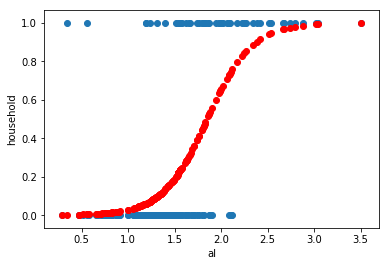

In [26]:
plt.scatter(glass.al, glass.household)
plt.scatter(glass.al, glass.household_pred_prob, color='red')
# plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

## Iris data classification

In [30]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [37]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you

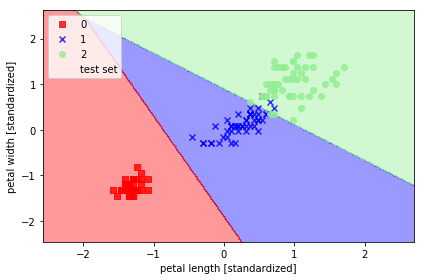

In [38]:
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)


plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

In [43]:
X_combined_std

array([[-0.18295039, -0.29318114],
       [ 0.93066067,  0.7372463 ],
       [ 1.04202177,  1.63887031],
       [ 0.6522579 ,  0.35083601],
       [ 1.09770233,  0.7372463 ],
       [ 0.03977182, -0.16437771],
       [ 1.26474398,  1.38126345],
       [ 0.48521625,  0.47963944],
       [-0.01590873, -0.16437771],
       [ 0.59657735,  0.7372463 ],
       [ 0.70793846,  0.35083601],
       [ 0.37385514,  0.60844287],
       [ 0.6522579 ,  0.86604973],
       [ 0.48521625,  0.22203258],
       [ 0.76361901,  0.99485316],
       [ 0.37385514,  0.47963944],
       [-1.24088089, -1.32360858],
       [ 0.70793846,  0.86604973],
       [ 0.20681348,  0.09322915],
       [-0.12726983,  0.09322915],
       [ 0.09545238,  0.09322915],
       [ 0.42953569,  0.22203258],
       [ 1.20906343,  0.7372463 ],
       [-1.29656144, -1.32360858],
       [-1.51928365, -1.45241201],
       [ 0.81929956,  0.86604973],
       [ 0.20681348, -0.03557428],
       [-1.18520034, -1.32360858],
       [-1.29656144,

In [45]:
import pandas as pd
url = 'data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123) # random_state = seed. 같은 샘플 추출.

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1000) # C : 1/alpha --> alpha가 커지면(=C가 작아지면) 제약이 강해짐. 
# 파라미터 중 n_Jobs : 학습 속도를 높일 수 있음. CPU 더 쓰는 것 같은 것. sklearn Googling.
logreg.fit(X_train, y_train)
print(list(zip(feature_cols, logreg.coef_[0])))

[('Pclass', -0.8224241864081496), ('Parch', 0.2716798445754946)]


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
print(logreg.coef_) # List에 List가 또 붙어있음.
print(logreg.coef_[0]) # 하나 벗겨 줌.

[[-0.82242419  0.27167984]]
[-0.82242419  0.27167984]


In [53]:
y_pred_class = logreg.predict(X_test)

In [54]:
y_pred_prob = logreg.predict_proba(X_test)

In [55]:
y_pred_prob # 확률이 나오는데, 1, 0 결정의 raw data를 볼 수 있음

array([[0.70866641, 0.29133359],
       [0.76144096, 0.23855904],
       [0.38124844, 0.61875156],
       [0.38124844, 0.61875156],
       [0.76144096, 0.23855904],
       [0.58374631, 0.41625369],
       [0.58374631, 0.41625369],
       [0.58374631, 0.41625369],
       [0.70866641, 0.29133359],
       [0.51846071, 0.48153929],
       [0.64958968, 0.35041032],
       [0.76144096, 0.23855904],
       [0.31953003, 0.68046997],
       [0.76144096, 0.23855904],
       [0.38124844, 0.61875156],
       [0.70866641, 0.29133359],
       [0.38124844, 0.61875156],
       [0.38124844, 0.61875156],
       [0.51846071, 0.48153929],
       [0.58374631, 0.41625369],
       [0.64958968, 0.35041032],
       [0.4488822 , 0.5511178 ],
       [0.58374631, 0.41625369],
       [0.70866641, 0.29133359],
       [0.70866641, 0.29133359],
       [0.76144096, 0.23855904],
       [0.76144096, 0.23855904],
       [0.38124844, 0.61875156],
       [0.76144096, 0.23855904],
       [0.76144096, 0.23855904],
       [0.

In [56]:
# calculate classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class)) 

0.6995515695067265


In [57]:
print(metrics.confusion_matrix(y_test, y_pred_class)) # 배운 거랑 위치 다르니까 잘 확인할 것

[[114  25]
 [ 42  42]]


In [58]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [59]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 42
True Negatives: 114
False Positives: 25
False Negatives: 42


In [60]:
# calculate the sensitivity
print('Sensitivity:', TP / (TP + FN))

Sensitivity: 0.5


In [61]:
# calculate the specificity
print('Specificity:', TN / (TN + FP))

Specificity: 0.8201438848920863


In [62]:
print(metrics.f1_score(y_test, y_pred_class))

0.5562913907284769


In [63]:
print(metrics.classification_report(y_test, y_pred_class))
# support : 해당 class의 수

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       139
           1       0.63      0.50      0.56        84

   micro avg       0.70      0.70      0.70       223
   macro avg       0.68      0.66      0.66       223
weighted avg       0.69      0.70      0.69       223



In [64]:
test = logreg.predict_proba(X_test) # 확률을 뽑음(오른쪽이 살아남을 확률)
print(test)

[[0.70866641 0.29133359]
 [0.76144096 0.23855904]
 [0.38124844 0.61875156]
 [0.38124844 0.61875156]
 [0.76144096 0.23855904]
 [0.58374631 0.41625369]
 [0.58374631 0.41625369]
 [0.58374631 0.41625369]
 [0.70866641 0.29133359]
 [0.51846071 0.48153929]
 [0.64958968 0.35041032]
 [0.76144096 0.23855904]
 [0.31953003 0.68046997]
 [0.76144096 0.23855904]
 [0.38124844 0.61875156]
 [0.70866641 0.29133359]
 [0.38124844 0.61875156]
 [0.38124844 0.61875156]
 [0.51846071 0.48153929]
 [0.58374631 0.41625369]
 [0.64958968 0.35041032]
 [0.4488822  0.5511178 ]
 [0.58374631 0.41625369]
 [0.70866641 0.29133359]
 [0.70866641 0.29133359]
 [0.76144096 0.23855904]
 [0.76144096 0.23855904]
 [0.38124844 0.61875156]
 [0.76144096 0.23855904]
 [0.76144096 0.23855904]
 [0.64958968 0.35041032]
 [0.51661682 0.48338318]
 [0.58374631 0.41625369]
 [0.76144096 0.23855904]
 [0.51661682 0.48338318]
 [0.76144096 0.23855904]
 [0.76144096 0.23855904]
 [0.76144096 0.23855904]
 [0.58374631 0.41625369]
 [0.38124844 0.61875156]


In [65]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1] # 두 번째 열(살아남을 확률)만 가져오겠음.

Text(0, 0.5, 'Frequency')

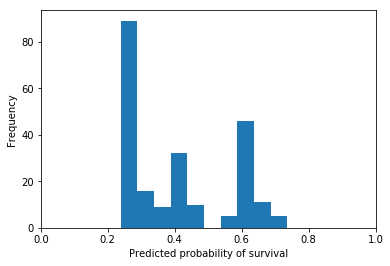

In [66]:
# histogram of predicted probabilities
%matplotlib inline
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [67]:
# increase sensitivity by lowering the threshold for predicting survival
y_pred_class_new = np.where(y_pred_prob >= 0.3, 1, 0) # 0.3 이상이면 1, 아니면 0. np 문법.

In [68]:
y_pred_class_new

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0])

In [69]:
# old confusion matrix
print(confusion)

[[114  25]
 [ 42  42]]


In [70]:
confusion_new = metrics.confusion_matrix(y_test, y_pred_class_new)
print(confusion_new)

[[84 55]
 [21 63]]


In [71]:
TP = confusion_new[1][1]
TN = confusion_new[0][0]
FP = confusion_new[0][1]
FN = confusion_new[1][0]

In [72]:
# new sensitivity (higher than before)
print('Sensitivity:', TP / float(TP + FN))

Sensitivity: 0.75


In [73]:
# new specificity (lower than before)
print('Specificity:', TN / float(TN + FP))

Specificity: 0.60431654676259


In [74]:
print(metrics.classification_report(y_test, y_pred_class_new))

              precision    recall  f1-score   support

           0       0.80      0.60      0.69       139
           1       0.53      0.75      0.62        84

   micro avg       0.66      0.66      0.66       223
   macro avg       0.67      0.68      0.66       223
weighted avg       0.70      0.66      0.66       223



In [75]:
from sklearn.metrics import roc_curve, auc

In [76]:
classifier = LogisticRegression(penalty='l2', C=1)
y_prob = classifier.fit(X_train, y_train).predict_proba(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [77]:
print(y_prob[0:5,:])

[[0.70491473 0.29508527]
 [0.75808298 0.24191702]
 [0.39390225 0.60609775]
 [0.39390225 0.60609775]
 [0.75808298 0.24191702]]


In [78]:
print(y_score[0:5]) # y_prob랑 y_score 중 어떤 걸 써도 상관 없음

[-0.87081249 -1.14219806  0.43093848  0.43093848 -1.14219806]


In [79]:
fpr, tpr, _ = roc_curve(y_test, y_score) # , _ 로 변수를 하나 생략할 수 있음. 빼면 에러남.
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.72242206235012


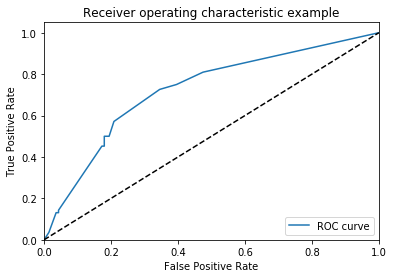

In [80]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc


In [2]:
url = 'data/titanic.csv'
titanic = pd.read_csv(url, index_col = 'PassengerId')

In [6]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.Age.isnull()

PassengerId
1      False
2      False
3      False
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18      True
19     False
20      True
21     False
22     False
23     False
24     False
25     False
26     False
27      True
28     False
29      True
30      True
       ...  
862    False
863    False
864     True
865    False
866    False
867    False
868    False
869     True
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879     True
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [10]:
age_group = []
for i in range(0, len(titanic)):
    age = titanic.iloc[i].Age
    age = 'child' if age < 20 else 'adult' if age >= 20 else  'unknown'
    age_group.append(age)

In [12]:
titanic['Age_modified'] = age_group

In [13]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_modified
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult


In [14]:
Age_dummies = pd.get_dummies(titanic.Age_modified, prefix = 'Age')
Age_dummies.sample(n = 10)

,Age_adult,Age_child,Age_unknown
PassengerId,,,
772,1,0,0
19,1,0,0
386,0,1,0
215,0,0,1
115,0,1,0
811,1,0,0
497,1,0,0
680,1,0,0
392,1,0,0


In [15]:
Embarked_dummies = pd.get_dummies(titanic.Embarked, prefix = 'Embarked')
Embarked_dummies.sample(n= 10)

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
812,0,0,1
823,0,0,1
321,0,0,1
207,0,0,1
149,0,0,1
708,0,0,1
785,0,0,1
576,0,0,1
868,0,0,1


In [17]:
Sex_dummies = pd.get_dummies(titanic.Sex, prefix = 'Sex')
Sex_dummies.sample (n = 10)

,Sex_female,Sex_male
PassengerId,,
706,0,1
644,0,1
375,1,0
524,1,0
885,0,1
709,1,0
514,1,0
751,1,0
551,0,1


In [18]:
data = pd.concat([titanic, Age_dummies, Embarked_dummies, Sex_dummies], axis = 1)

In [19]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_modified,Age_adult,Age_child,Age_unknown,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,1,0,0,0,0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,1,0,0,1,0,0,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,1,0,0,0,0,1,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,1,0,0,0,0,1,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,1,0,0,0,0,1,0,1


In [20]:
data = data.drop(['Name', 'Sex', 'Age', 'Age_modified', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)

In [21]:
col_names = data.columns.values

In [22]:
X = data[col_names[1:]]
Y = data[col_names[0]]

In [23]:
X.head(5)

,Pclass,SibSp,Parch,Age_adult,Age_child,Age_unknown,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
1,3,1,0,1,0,0,0,0,1,0,1
2,1,1,0,1,0,0,1,0,0,1,0
3,3,0,0,1,0,0,0,0,1,1,0
4,1,1,0,1,0,0,0,0,1,1,0
5,3,0,0,1,0,0,0,0,1,0,1


In [25]:
Y.head(5)

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=5079)

In [28]:
C_set = [0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 1e6]

result = []

for C in C_set:
    logreg = LogisticRegression(penalty = 'l2', dual=True, C = C, class_weight='balanced')
    Y_score = logreg.fit(X_train, Y_train).decision_function(X_test)
    fpr, tpr, _ = roc_curve(Y_test, Y_score)
    result.append(auc(fpr, tpr))

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\

In [29]:
result

[0.8063252515256474,
 0.8055005772719775,
 0.8054181098466107,
 0.8057479795480785,
 0.8087168068612898,
 0.774905162460828,
 0.8070674583539501,
 0.7862856671614712]

In [30]:
max(result)

0.8087168068612898

# Exercise 2

In [44]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data
titanic = pd.read_csv('data/titanic.csv', index_col='PassengerId')
# url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
# titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C641908>,
      dtype=object)

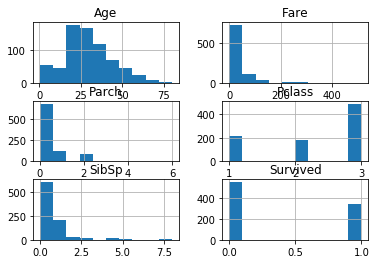

In [45]:
titanic.hist()

Text(0, 0.5, 'Survived')

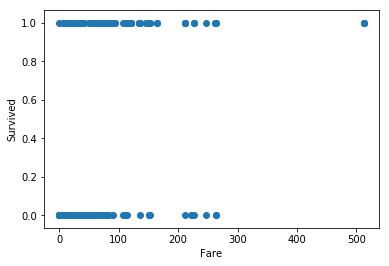

In [46]:
plt.scatter(titanic.Fare, titanic.Survived)
plt.xlabel('Fare')
plt.ylabel('Survived')

In [47]:
embark_dum = pd.get_dummies(titanic.Embarked, prefix='port')
embark_dum.drop(embark_dum.columns[2], axis=1, inplace=True)

titanic['Gender'] = titanic.Sex.map({'male':1, 'female':0})
titanic_new = pd.concat([titanic, embark_dum], axis=1)
titanic_new = titanic_new.drop(['Sex', 'Name', 'Ticket'], axis=1)

In [48]:
titanic_new.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Gender,port_C,port_Q
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,NaN,S,1,0,0
2,1,1,38.0,1,0,71.2833,C85,C,0,1,0
3,1,3,26.0,0,0,7.9250,NaN,S,0,0,0
4,1,1,35.0,1,0,53.1000,C123,S,0,0,0
5,0,3,35.0,0,0,8.0500,NaN,S,1,0,0


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import StratifiedKFold

def train_test_logistic(X, Y, c_value):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
    model = LogisticRegression(penalty='l2', C=c_value)
    model.fit(X_train, Y_train)
    
    # Save intercept
    col_names = list(X.columns.values)
    coef = list(zip(col_names, model.coef_[0]))
    coef.append(('intercept', model.intercept_[0]))
    # Calculate training RMSE and testing RMSE
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))
    rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))
    
    # Calculate training R-square and testing R-square
    rsquared_train = model.score(X_train, Y_train)
    rsquared_test = model.score(X_test, Y_test)
    
    # AUROC
    Y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(Y_test, Y_score)
    roc_auc = auc(fpr, tpr)
    
    # Make result dictionary
    result={'coefficient':coef, 'rmse_train':rmse_train, 'rmse_test':rmse_test,
           'rsquared_train':rsquared_train, 'rsquared_test':rsquared_test, 'auroc':roc_auc}
    
    return result

In [53]:
X_full = titanic_new.drop(['Survived','Cabin', 'Embarked', 'Age'], axis=1) #'Name', 'Sex', 'Ticket',  넣었더니 에러나서 뺌
f_cols = list(X_full.columns.values)
print(f_cols)

y = titanic_new.Survived

opt_auroc = 0.5
result = pd.DataFrame(columns=('var1', 'auroc'))

for n in range(len(f_cols)):
    sel_cols = [f_cols[n]]
    
    X = X_full[sel_cols]
    train_result = train_test_logistic(X, y, 0.2)
    
    result.loc[len(result)]=[sel_cols[0], train_result['auroc']]
    # result.append('var1': selected_cols[0], 'var2': selected_cols[0], 'auroc': train_result['auroc'])
    if (train_result['auroc'] > opt_auroc):
        opt_auroc = train_result['auroc']
        opt_cols = sel_cols
            
result = result.sort_values(by='auroc', ascending=False)
print(result)
print()

X = X_full[opt_cols]
train_result = train_test_logistic(X, y, 0.2)
print("Best Combination:", opt_cols)
print("AUROC:", train_result['auroc'])

best_cols_1 = opt_cols

['Pclass', 'SibSp', 'Parch', 'Fare', 'Gender', 'port_C', 'port_Q']
     var1     auroc
4  Gender  0.776351
3    Fare  0.714916
0  Pclass  0.703691
5  port_C  0.583854
2   Parch  0.553721
6  port_Q  0.489436
1   SibSp  0.458854

Best Combination: ['Gender']
AUROC: 0.7763505402160865


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-package

In [55]:
# When num_variable = 2
opt_auroc = 0.5
result = pd.DataFrame(columns=('var1', 'var2', 'auroc'))

for n in range(len(f_cols)):
    for m in range(n+1, len(f_cols)):
        sel_cols = []
        sel_cols.append(f_cols[n])
        sel_cols.append(f_cols[m])

        X = X_full[sel_cols]
        train_result = train_test_logistic(X, y, 0.1)
        
        result.loc[len(result)]=[sel_cols[0], sel_cols[1], train_result['auroc']]
        # result.append('var1': selected_cols[0], 'var2': selected_cols[0], 'auroc': train_result['auroc'])
        if (train_result['auroc'] > opt_auroc):
            opt_auroc = train_result['auroc']
            opt_cols = sel_cols

result_sorted = result.sort_values(by='auroc', ascending=False)
print(result_sorted[:5])
print()

X = X_full[opt_cols]
train_result = train_test_logistic(X, y, 0.2)
print("Best Combination:", opt_cols)
print("AUROC:", train_result['auroc'])

best_cols_2 = opt_cols

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-package

      var1    var2     auroc
3   Pclass  Gender  0.852761
15    Fare  Gender  0.842347
18  Gender  port_C  0.807143
19  Gender  port_Q  0.785774
12   Parch  Gender  0.775090

Best Combination: ['Pclass', 'Gender']
AUROC: 0.8527611044417768


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
# When num_variable = 3
opt_auroc = 0.5
result = pd.DataFrame(columns=('var1', 'var2', 'var3', 'auroc'))

for n in range(len(f_cols)):
    for m in range(n+1, len(f_cols)):
        for k in range(m+1, len(f_cols)):
            sel_cols = []
            sel_cols.append(f_cols[n])
            sel_cols.append(f_cols[m])
            sel_cols.append(f_cols[k])
            
            X = X_full[sel_cols]
            train_result = train_test_logistic(X, y, 0.5)

            result.loc[len(result)]=[sel_cols[0], sel_cols[1], sel_cols[2], train_result['auroc']]
            if (train_result['auroc'] > opt_auroc):
                opt_auroc = train_result['auroc']
                opt_cols = sel_cols

result_sorted = result.sort_values(by='auroc', ascending=False)
print(result_sorted[:5])
print()

X = X_full[opt_cols]
train_result = train_test_logistic(X, y, 0.2)
print("Best Combination:", opt_cols)
print("AUROC:", train_result['auroc'])

best_cols_3 = opt_cols

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-package

      var1    var2    var3     auroc
12  Pclass  Gender  port_C  0.858884
9   Pclass    Fare  Gender  0.855792
6   Pclass   Parch  Gender  0.853812
2   Pclass   SibSp  Gender  0.852041
13  Pclass  Gender  port_Q  0.851471

Best Combination: ['Pclass', 'Gender', 'port_C']
AUROC: 0.8588835534213686


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-package

In [57]:
# How about 4?
selected_cols = ['Pclass', 'Gender', 'port_C', 'port_Q']
X = X_full[selected_cols]
train_result = train_test_logistic(X, y, 0.2)
print(selected_cols)
print("AUROC:", train_result['auroc'])

['Pclass', 'Gender', 'port_C', 'port_Q']
AUROC: 0.8581032412965186


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
# Optimized
# opt_cols = best_cols_1
# opt_cols = best_cols_2
opt_cols = best_cols_3
X_opt = X_full[opt_cols]

optimized = LogisticRegression(penalty='l2', C=0.2)
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.3, random_state=123)
optimized.fit(X_train, y_train)
y_score = optimized.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


COEFFICIENT: [('Pclass', -0.503801056482079), ('Gender', -1.905131527834584), ('port_C', 0.500380080502495), ('intercept', 1.712381605517322)]
RMSE_TRAIN: 0.4672243094887156
RMSE_TEST: 0.4488792012484348
RSQUARED_TRAIN: 0.7817014446227929
RSQUARED_TEST: 0.7985074626865671
AUROC: 0.8588835534213686


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


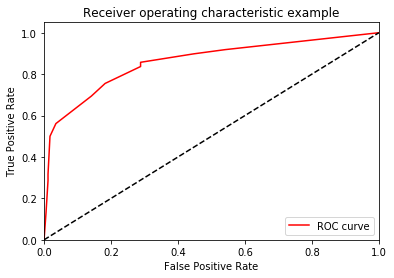

In [59]:
# Summary
result = train_test_logistic(X_opt, y, 0.2)
for key in result.keys():
    print("%s: %s" % (key.upper(), result[key]))

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, 'r', label = 'ROC curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()